# Processos Estocásticos - Trabalho de Simulação

**Alunos:** Matheus Popst e Vitória Guardieiro

In [12]:
import numpy as np
from matplotlib import pyplot as pl

## Exercício 1

In [2]:
from exercicio1 import exercicio1

In [3]:
P = np.matrix([[1/3, 0, 2/3, 0, 0],
              [1/4, 1/2, 1/4, 0, 0],
              [1/2, 0, 1/2, 0, 0],
              [0, 0, 0, 0, 1],
              [0, 0, 0, 2/3, 1/3]])

## Exercício 2

In [14]:
P = np.matrix([[1/3, 0, 2/3, 0],
              [1/4, 1/2, 1/4, 0],
              [1/2, 0, 1/2, 0],
              [0, 1/3, 0, 2/3]])

# Exercício 3

## Exercício 4

## Exercício 5

In [4]:
from exercicio5 import exercicio5

In [7]:
n, m = 9, 1000

In [8]:
X = np.linspace(-5, 5, n)
Y = np.sin(X)+np.random.normal(loc = 0, scale = 0.001, size = n)
Xn = np.linspace(-5, 5, m)

In [9]:
mu, cov = exercicio5(X, Xn, Y, 0.01);

In [10]:
stdv = np.sqrt(np.diag(cov))

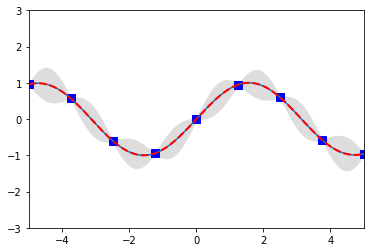

In [13]:
pl.plot(X, Y, 'bs', ms=8, label="Pontos iniciais")
pl.plot(Xn, mu, label="Média")
pl.gca().fill_between(Xn, mu-2*stdv, mu+2*stdv, color="#dddddd", label="Intervalo de confiança")
pl.plot(Xn, mu, 'r--', lw=2, label="Função aproximada")
pl.axis([-5, 5, -3, 3])
#pl.title('Three samples from the GP posterior')
#pl.legend()
pl.show()

## Exercício 6

## Exercício 7